In [59]:
from matplotlib import patches
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from math import log, log10, sqrt
import pandas as pd


In [61]:
from data_analysis.pcap_proc import read_pcap_to_df
from data_analysis.rssi_filter import filter_and_smooth_max, filter_and_smooth_max_median, \
    filter_and_smooth_kalman
from data_analysis.rssi_plot import plot_rssi, plot_rssi_2
from data_analysis.df_reindexer import DfReindexer
from data_analysis.df_merger import DfMerger
from sink.bp_quadlateration import BpQuadlateration
import data_analysis.zi_lemming as zln


# Notebook for Lemming Zimmer data


## First, set some directories and constants for the data


In [62]:
zi_lemming_dir = "C:/Users/alain/bluepil-master/data/experiment1_indoor/"
balkonien_dir = "C:/Users/alain/bluepil-master/data/experiment1_outdoor/"
exp_dir = balkonien_dir

results_dir = f'{exp_dir}results/'

dir_1_p1_5min = exp_dir + "1-p1-5min/"
dir_2_p2_5min = exp_dir + "2-p2-5min/"
dir_3_p3_5min = exp_dir + "3-p3-5min/"
dir_4_p4_5min = exp_dir + "4-p4-5min/"
dir_5_p5_5min = exp_dir + "5-p5-5min/"
dir_6_p6_5min = exp_dir + "6-p6-5min/"
dir_7_p7_5min = exp_dir + "7-p7-5min/"
dir_8_p8_5min = exp_dir + "8-p8-5min/"
dir_9_p9_5min = exp_dir + "9-p9-5min/"
dir_10_p1_10min = exp_dir + "10-p1-10min/"
dir_11_p6_p7_1min = exp_dir + "11-p6-p7-1min/"
dir_13_p1_10min_ipad = exp_dir + "13-p1-10min-ipad/"
dir_14_p6_p5_p2_1min = exp_dir + "14-p6-p5-p2-1min/"
dir_15_p1_10min_nostream = exp_dir + "15-p1-10min-nostream/"

d1_file = "D1.pcap"
d2_file = "D2.pcap"
d3_file = "D3.pcap"
d4_file = "D4.pcap"

d1_coord = (0, 0)
d2_coord = (0, 2.9)
d3_coord = (4.2, 0)
d4_coord = (4.2, 2.9)

p1_coord = (2.1, 0)
p2_coord = (1.05, 0)
p3_coord = (3.15, 0)
p4_coord = (2.1, 1.45)
p5_coord = (1.05, 1.45)
p6_coord = (3.15, 1.45)
p7_coord = (0, 1.45)
p8_coord = (1.05, 0.725)
p9_coord = (2.1, 0.725)

jbl_lap = "4b539600"
nokia_lap = "2d052200"

## Let's try all different combinations for filtering and positioning
with exp 1

In [63]:
dir = dir_6_p6_5min
p_true = p6_coord
# zln.position_dataset_with_methods(dir, nokia_lap, p_true, "mean", "nlls")
# zln.position_dataset_with_methods(dir, nokia_lap, p_true, "max-mean", "nlls")
# zln.position_dataset_with_methods(dir, nokia_lap, p_true, "max-median", "nlls")
# zln.position_dataset_with_methods(dir, nokia_lap, p_true, "kalman", "nlls")
# zln.position_dataset_with_methods(dir, nokia_lap, p_true, "kalman-max", "nlls")
# zln.position_dataset_with_methods(dir, nokia_lap, p_true, "kalman", "nlls-kalman")
# zln.position_dataset_with_methods(dir, nokia_lap, p_true, "kalman-max", "nlls-kalman")
# zln.position_dataset_with_methods(dir, nokia_lap, p_true, "max-mean", "nlls-kalman")

## Let's compare jbl and nokia estimations

In [64]:
# zln.position_dataset_with_methods(dir, nokia_lap, "kalman-max", "nlls", p_true)
# zln.position_dataset_with_methods(dir, jbl_lap, "kalman-max", "nlls", p_true)


## Let's throw all of this into one method and try it for all datasets

## Exp 1, Point 1, 5min

In [65]:
def calculate_all_methods(dir, lap, resampling_rate, resampling_rate_seconds, p_true=None, path_true=None):
    results = {}
    # results["mean, nlls-kalman"] = zln.position_dataset_with_methods(dir, lap, "mean", "nlls-kalman", results_dir, p_true, path_true, resampling_rate=resampling_rate, resampling_rate_in_seconds=resampling_rate_seconds)
    results["max-mean, nlls-kalman"] = zln.position_dataset_with_methods(dir, lap, "max-mean", "nlls-kalman", results_dir, p_true, path_true, resampling_rate=resampling_rate, resampling_rate_in_seconds=resampling_rate_seconds)
    # results["max-median, nlls-kalman"] = zln.position_dataset_with_methods(dir, lap, "max-median", "nlls-kalman", results_dir, p_true, path_true, resampling_rate=resampling_rate, resampling_rate_in_seconds=resampling_rate_seconds)
    # results["max-mean, nlls-kalman"] = zln.position_dataset_with_methods(dir, lap, "max-mean", "nlls-kalman", results_dir, p_true, path_true, resampling_rate=resampling_rate, resampling_rate_in_seconds=resampling_rate_seconds)
    # results["max-mean, nlls"] = zln.position_dataset_with_methods(dir, lap, "max-mean", "nlls", results_dir, p_true, path_true, resampling_rate=resampling_rate, resampling_rate_in_seconds=resampling_rate_seconds)
    return results

def calculate_all(dir, p_true, resampling_rate = "5s", resampling_rate_seconds = 1):
    return calculate_all_methods(dir, nokia_lap, resampling_rate, resampling_rate_seconds, p_true)
    # calculate_all_methods(dir, jbl_lap, resampling_rate, resampling_rate_seconds, p_true)


def calculate_all_path(dir, path_true, resampling_rate = "1s", resampling_rate_seconds = 1):
    calculate_all_methods(dir, nokia_lap, resampling_rate, resampling_rate_seconds, path_true=path_true)
    # calculate_all_methods(dir, jbl_lap, resampling_rate, resampling_rate_seconds, path_true=path_true)


In [66]:
res_p1 = calculate_all(dir_1_p1_5min, p1_coord)


df0: 460 rows
df1: 411 rows
df2: 448 rows
df3: 439 rows
average length: 439.5
50% qantile: 0.3292266021874859
66% qantile: 0.37865668922759765
80% qantile: 0.7119239980976534
90% qantile: 0.8853738034495691
true: (2.1, 0), extimated avg: (2.11802840988937,0.2570727357417811), error avg: 0.39808441480137363
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/(2.1, 0)_None_max-mean_nlls-kalman_2d052200.png


## Exp 2, Point 2, 5min


In [67]:
res_p2 = calculate_all(dir_2_p2_5min, p2_coord)

df0: 417 rows
df1: 324 rows
df2: 351 rows
df3: 327 rows
average length: 354.75
50% qantile: 1.7030400851033816
66% qantile: 1.7546260607607733
80% qantile: 1.8186789101063492
90% qantile: 1.852985502210065
true: (1.05, 0), extimated avg: (1.7050176199140092,1.5378974155999772), error avg: 1.7033819289831453
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/(1.05, 0)_None_max-mean_nlls-kalman_2d052200.png


## Exp 3, Point 3, 5min


In [68]:
res_p3 = calculate_all(dir_3_p3_5min, p3_coord)


df0: 382 rows
df1: 404 rows
df2: 414 rows
df3: 390 rows
average length: 397.5
50% qantile: 1.163626480858808
66% qantile: 1.2896153824520924
80% qantile: 1.3387143723197894
90% qantile: 1.4163311253247801
true: (3.15, 0), extimated avg: (2.204032947826055,0.5912275186368509), error avg: 1.1497091183978942
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/(3.15, 0)_None_max-mean_nlls-kalman_2d052200.png


## Exp 4, Point 4, 5min


In [69]:
res_p4 = calculate_all(dir_4_p4_5min, p4_coord)


df0: 337 rows
df1: 365 rows
df2: 341 rows
df3: 293 rows
average length: 334.0
50% qantile: 1.2639217555835398
66% qantile: 1.375083239182176
80% qantile: 1.476752750140131
90% qantile: 1.5331126127011272
true: (2.1, 1.45), extimated avg: (1.6350578557689823,0.480289901047065), error avg: 1.1529936851536915
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/(2.1, 1.45)_None_max-mean_nlls-kalman_2d052200.png


## Exp 5, Point 5, 5min


In [70]:
res_p5 = calculate_all(dir_5_p5_5min, p5_coord)


df0: 325 rows
df1: 326 rows
df2: 309 rows
df3: 266 rows
average length: 306.5
50% qantile: 0.8460398519756167
66% qantile: 0.9143523425540674
80% qantile: 0.9994794778784286
90% qantile: 1.0761643133401746
true: (1.05, 1.45), extimated avg: (1.0594211886711675,0.716021568204002), error avg: 0.8548698699420987
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/(1.05, 1.45)_None_max-mean_nlls-kalman_2d052200.png


## Exp 6, Point 6, 5min


In [71]:
res_p6 = calculate_all(dir_6_p6_5min, p6_coord)


df0: 266 rows
df1: 277 rows
df2: 305 rows
df3: 288 rows
average length: 284.0
50% qantile: 1.3794735233704105
66% qantile: 1.4686886415594613
80% qantile: 1.6082923123824855
90% qantile: 1.7712066603591712
true: (3.15, 1.45), extimated avg: (2.479446371424795,0.4228077709847432), error avg: 1.3020275308340319
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/(3.15, 1.45)_None_max-mean_nlls-kalman_2d052200.png


## Exp 7, Point 7, 5min


In [72]:
res_p7 = calculate_all(dir_7_p7_5min, p7_coord)


df0: 155 rows
df1: 142 rows
df2: 125 rows
df3: 109 rows
average length: 132.75
50% qantile: 1.3851136907070545
66% qantile: 1.5174157322215533
80% qantile: 1.5366391580809908
90% qantile: 1.544433114174487
true: (0, 1.45), extimated avg: (1.0896508634697573,0.9829285798073379), error avg: 1.1951943200181259
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/(0, 1.45)_None_max-mean_nlls-kalman_2d052200.png


## Exp 8, Point 8, 5min


In [73]:
res_p8 = calculate_all(dir_8_p8_5min, p8_coord)


df0: 330 rows
df1: 297 rows
df2: 272 rows
df3: 244 rows
average length: 285.75
50% qantile: 0.8132406773589365
66% qantile: 0.9558715743223185
80% qantile: 1.0840215740383123
90% qantile: 1.3333474014539333
true: (1.05, 0.725), extimated avg: (1.1180861518480543,1.2936886062504018), error avg: 0.8353687214016666
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/(1.05, 0.725)_None_max-mean_nlls-kalman_2d052200.png


## Exp 9, Point 9, 5min


In [74]:
res_p9 = calculate_all(dir_9_p9_5min, p9_coord)


df0: 259 rows
df1: 256 rows
df2: 242 rows
df3: 222 rows
average length: 244.75
50% qantile: 0.6791069575664747
66% qantile: 0.8851178755422018
80% qantile: 1.058320684956573
90% qantile: 1.1871920181605546
true: (2.1, 0.725), extimated avg: (1.6446721438226908,0.8403144909054978), error avg: 0.7688181791403671
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/(2.1, 0.725)_None_max-mean_nlls-kalman_2d052200.png


In [75]:
LD = [res_p1, res_p2, res_p3, res_p4, res_p5, res_p6, res_p7, res_p8, res_p9]
DL = {k: [dic[k] for dic in LD] for k in LD[0]}

In [76]:
for key, value in DL.items():
    print(f'{key}: ME {np.mean(value)}')

max-mean, nlls-kalman: ME 1.0400497520747105


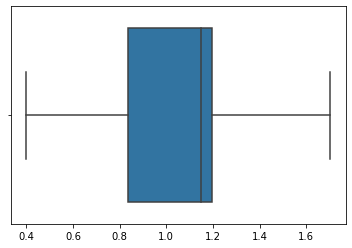

In [77]:
import seaborn as sb
sbplt = sb.boxplot(DL['max-mean, nlls-kalman']).get_figure()
sbplt.savefig("error_dist_exp1_outdoor")

## Exp 11


In [78]:
# zl.position_dataset(dir_11_p6_p7_1min, nokia_lap, p6_coord, resampling_rate="100ms")


## Exp 10


In [79]:
# zl.position_dataset(dir_10_p1_10min, nokia_lap, p1_coord)


## Exp 14

In [80]:
calculate_all_path(dir_14_p6_p5_p2_1min, [p6_coord, p5_coord, p2_coord], resampling_rate="100ms", resampling_rate_seconds=0.1)



df0: 53 rows
df1: 64 rows
df2: 67 rows
df3: 62 rows
average length: 61.5
saving: C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/None_[(3.15, 1.45), (1.05, 1.45), (1.05, 0)]_max-mean_nlls-kalman_2d052200.png


## Declare functions for loading data


In [81]:
def load_pcaps(exp_dir):
    d1 = read_pcap_to_df(exp_dir + d1_file, nokia_lap)
    d2 = read_pcap_to_df(exp_dir + d2_file, nokia_lap)
    d3 = read_pcap_to_df(exp_dir + d3_file, nokia_lap)
    d4 = read_pcap_to_df(exp_dir + d4_file, nokia_lap)
    return d1, d2, d3, d4


## And load the data

In [82]:
dfs8 = load_pcaps("C:/Users/alain/bluepil-master/data/experiment1_indoor/8-p8-5min/")

## Now plot the data


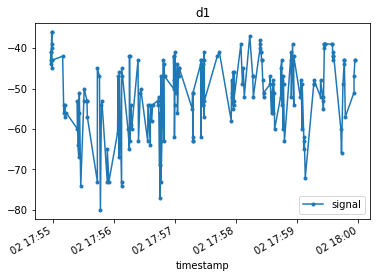

<Figure size 432x288 with 0 Axes>

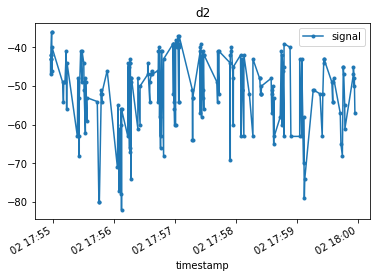

<Figure size 432x288 with 0 Axes>

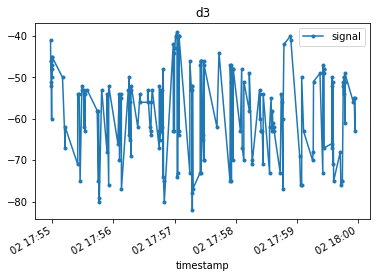

<Figure size 432x288 with 0 Axes>

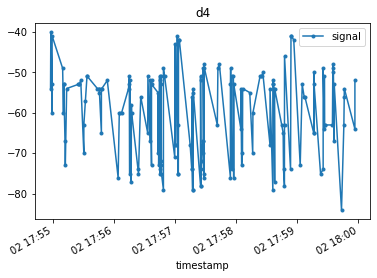

<Figure size 432x288 with 0 Axes>

In [83]:
plot_rssi(dfs8[0], "d1")
plot_rssi(dfs8[1], "d2")
plot_rssi(dfs8[2], "d3")
plot_rssi(dfs8[3], "d4")

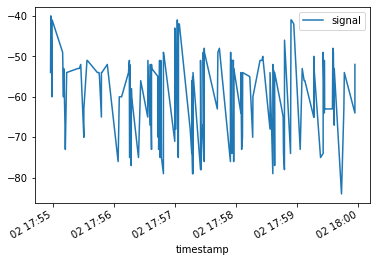

In [84]:
dfs8[3].plot(kind="line", x="timestamp", y="signal")
plt.savefig("rssi_ex.png", bbox_inches='tight', dpi=300)

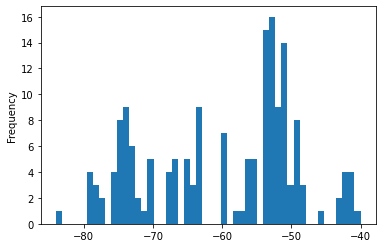

In [85]:
dfs8[3]["signal"].plot.hist(bins=50)
plt.savefig("rssi_ex_hist.png", bbox_inches='tight', dpi=300)

saving file C:/Users/alain/bluepil-master/data/experiment1_outdoor/results/measurements.png


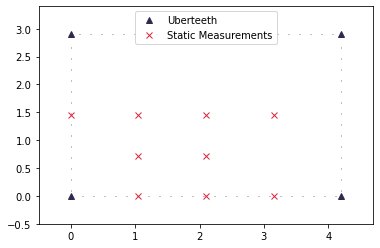

In [86]:
room_lim_x = (0, 4.2)
room_lim_y = (0, 2.9)

plot_padding = 0.5

plot_lim_x = (room_lim_x[0] - plot_padding, room_lim_x[1] + plot_padding)
plot_lim_y = (room_lim_y[0] - plot_padding, room_lim_y[1] + plot_padding)

ax = plt.subplot(xlim=plot_lim_x, ylim=plot_lim_y)

rect1 = patches.Rectangle((room_lim_x[0], room_lim_y[0]), room_lim_x[1], room_lim_y[1], linewidth=1,
                              edgecolor='gray', facecolor='none', linestyle=(0, (1, 10)))
ax.add_patch(rect1)

device_coords = np.transpose([d1_coord, d2_coord, d3_coord, d4_coord])
ax.plot(*device_coords, marker="^", color="#2E294E", linestyle='None', label="Uberteeth")

measurement_points = np.transpose([p1_coord, p2_coord, p3_coord, 
                                   p4_coord, p5_coord, p6_coord, 
                                   p7_coord, p8_coord, p9_coord])

ax.plot(*measurement_points, marker="x", color="#D7263D", label="Static Measurements", linestyle='None')
lgd = plt.legend(bbox_to_anchor=(0.5, 1), loc="upper center", ncol=1)
file = f"{results_dir}measurements.png"
print(f'saving file {file}')
plt.savefig(file, bbox_inches='tight', dpi=300)
plt.show()

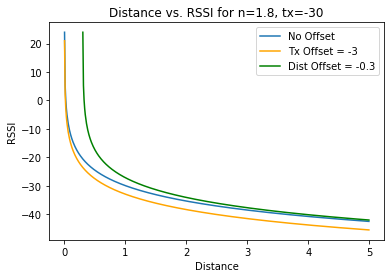

In [87]:
x = np.arange(0.001, 5, 0.01)
extx = -30
exn = 1.8
def path_loss(d, tx_offset=0, d_offset=0):
    try:
        return extx + tx_offset - 10 * exn * log10(d + d_offset)
    except ValueError:
        return None
def path_loss_tx_offset(d):
    return path_loss(d, tx_offset=-3)
def path_loss_d_offset(d):
    return path_loss(d, d_offset=-0.3)

y = list(map(path_loss, x))
ytxo = list(map(path_loss_tx_offset, x))
ydo = list(map(path_loss_d_offset, x))
plt.plot(x, y, label="No Offset")
plt.plot(x, ytxo, color="orange", label="Tx Offset = -3")
plt.plot(x, ydo, color="green", label="Dist Offset = -0.3")
plt.xlabel("Distance")
plt.ylabel("RSSI")
plt.title("Distance vs. RSSI for n=1.8, tx=-30")
plt.legend(loc='upper right', ncol=1)
plt.savefig("RSSIvsDist_ex.png", bbox_inches='tight', dpi=300)
plt.show()


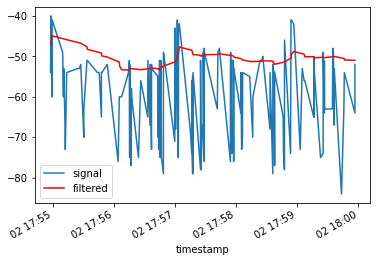

In [88]:
kalman_ex = filter_and_smooth_kalman(dfs8[3], "signal", "10s", filter_outliers=True).rename(columns={"signal": "filtered"})
ax = dfs8[3].plot(kind="line", x="timestamp", y="signal")
kalman_ex.plot(kind="line", x="timestamp", y="filtered", color="red", ax=ax)
plt.savefig("rssi_filtered_ex.png", bbox_inches='tight', dpi=300)

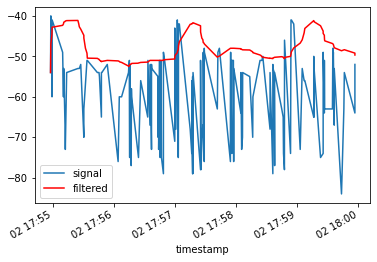

In [89]:
kalman_ex = filter_and_smooth_max(dfs8[3], "signal", "20s").rename(columns={"signal": "filtered"})
ax = dfs8[3].plot(kind="line", x="timestamp", y="signal")
kalman_ex.plot(kind="line", x="timestamp", y="filtered", color="red" , ax=ax)
plt.savefig("rssi_filtered_ex.png", bbox_inches='tight', dpi=300)

## Let's try filtering this


In [90]:
def filter_dfs_max_median(dfs):
    return list(map(lambda df: filter_and_smooth_max_median(df, "signal", "10s"), dfs))

def filter_dfs_kalman(dfs):
    return list(map(lambda df: filter_and_smooth_kalman(df, "signal", "10s", filter_outliers=False), dfs))

# filtered = filter_dfs_max_median(dfs8)
filtered = filter_dfs_kalman(dfs8)

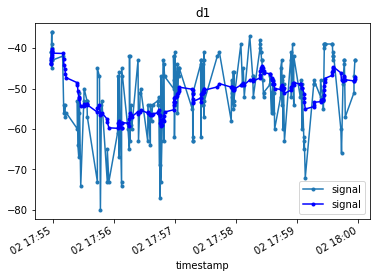

<Figure size 432x288 with 0 Axes>

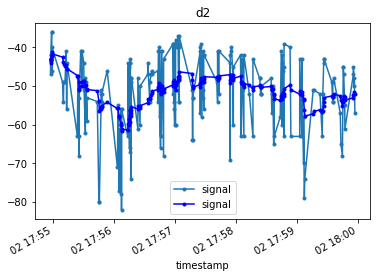

<Figure size 432x288 with 0 Axes>

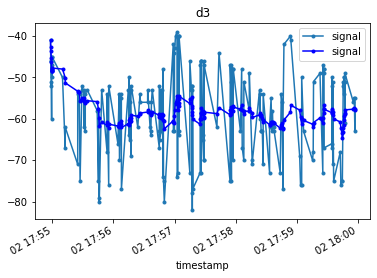

<Figure size 432x288 with 0 Axes>

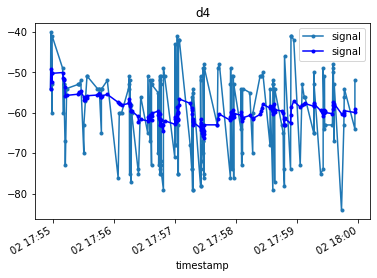

<Figure size 432x288 with 0 Axes>

In [91]:
def plot_signals(dfs, filtered):
    for i in range(1,5):
        plot_rssi_2(dfs[i-1], filtered[i-1], "d" + str(i))

plot_signals(dfs8, filtered)
# plot_signals(dfs8, filtered_kalman)


## Let's describe the signal values for these devices. There should be notable differences

For P8, the following should be true for the mean signal strenght:
* d1 should be highest
* d2 should be second
* d3 should be third
* d4 should be fourth


In [92]:
def print_signal_stats(dfs):
    for i in range(1,5):
        print("d" + str(i))
        print(dfs[i-1]["signal"].describe())
        print("")


In [93]:
print_signal_stats(filtered)


d1
count    202.000000
mean     -51.053760
std        4.610064
min      -59.828433
25%      -54.462870
50%      -50.402254
75%      -48.032214
max      -40.134489
Name: signal, dtype: float64

d2
count    202.000000
mean     -51.184950
std        4.019902
min      -61.712653
25%      -53.314634
50%      -50.778374
75%      -48.821095
max      -41.242372
Name: signal, dtype: float64

d3
count    189.000000
mean     -58.070488
std        3.824653
min      -64.522768
25%      -60.475126
50%      -58.787858
75%      -57.333118
max      -41.000000
Name: signal, dtype: float64

d4
count    170.000000
mean     -59.460628
std        3.164218
min      -66.172283
25%      -61.539980
50%      -59.918474
75%      -57.808293
max      -49.256274
Name: signal, dtype: float64



As we can see, our theories don't hold yet for the order of d1 and d2, but do for the rest

Let's also try a different filtering method


In [94]:
def filter_dfs_max_mean(dfs):
    return list(map(lambda df: filter_and_smooth_max(df, "signal", "20s"), dfs))

filtered_mean = filter_dfs_max_mean(dfs8)


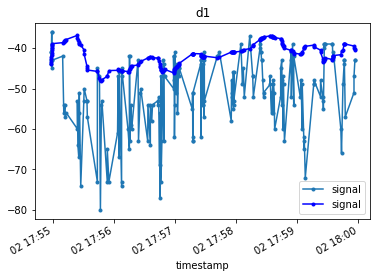

<Figure size 432x288 with 0 Axes>

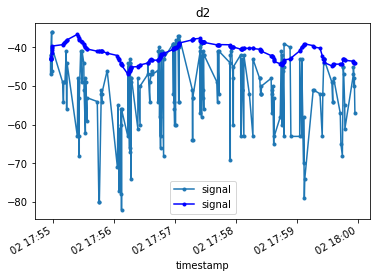

<Figure size 432x288 with 0 Axes>

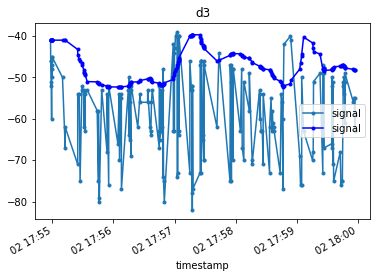

<Figure size 432x288 with 0 Axes>

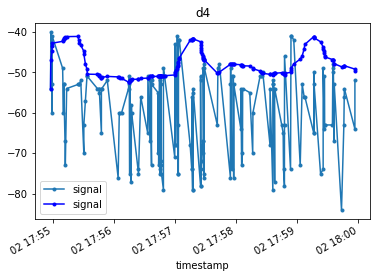

<Figure size 432x288 with 0 Axes>

In [95]:
plot_signals(dfs8, filtered_mean)


In [96]:
print_signal_stats(filtered_mean)


d1
count    202.000000
mean     -41.709637
std        2.800028
min      -48.100000
25%      -44.155331
50%      -41.464103
75%      -39.511364
max      -36.857143
Name: signal, dtype: float64

d2
count    202.000000
mean     -41.457611
std        2.354930
min      -46.900000
25%      -43.272727
50%      -41.000000
75%      -39.559524
max      -36.625000
Name: signal, dtype: float64

d3
count    189.000000
mean     -47.141736
std        3.883707
min      -52.333333
25%      -50.800000
50%      -47.684211
75%      -44.400000
max      -39.695652
Name: signal, dtype: float64

d4
count    170.000000
mean     -47.947085
std        3.368164
min      -54.000000
25%      -50.888340
50%      -48.521978
75%      -45.909091
max      -41.125000
Name: signal, dtype: float64



Let's try another one


In [97]:
# def filter_dfs_mean(dfs):
#     return list(map(lambda df: filter_and_smooth_mean(df, "signal", "10s"), dfs))
#
# filtered_mean = filter_dfs_mean(dfs8)


In [98]:
# plot_signals(dfs8, filtered_mean)


In [99]:
# print_signal_stats(filtered_mean)


Now this looks quite different.

We should try this filtering method as well when trying to quadlaterate. 
Maybe also try to adjust the parameters a bit...


## Now, reindex
and plot the resulting dfs


In [100]:
ridxr = DfReindexer("500ms", "signal", "timestamp")
filtered_mean_ri = ridxr.reindex_dfs(*filtered_mean)
filtered_ri = ridxr.reindex_dfs(*filtered)


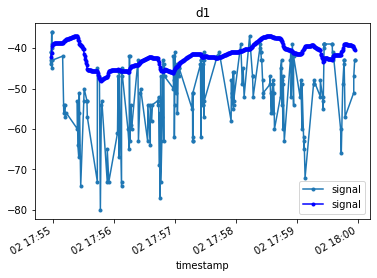

<Figure size 432x288 with 0 Axes>

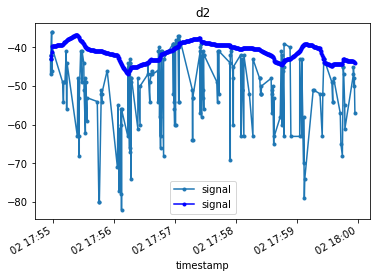

<Figure size 432x288 with 0 Axes>

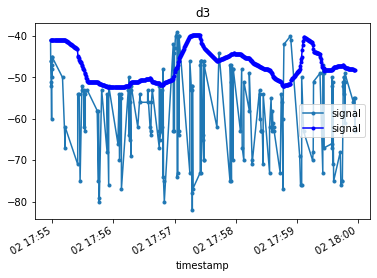

<Figure size 432x288 with 0 Axes>

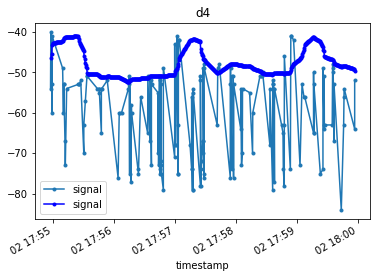

<Figure size 432x288 with 0 Axes>

In [101]:
plot_signals(dfs8, filtered_mean_ri)


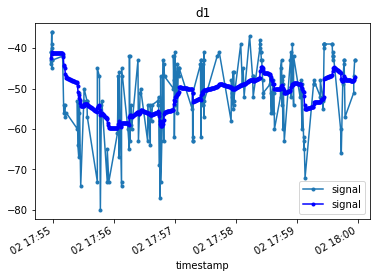

<Figure size 432x288 with 0 Axes>

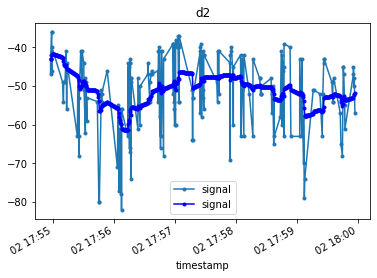

<Figure size 432x288 with 0 Axes>

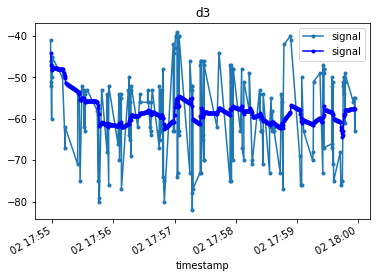

<Figure size 432x288 with 0 Axes>

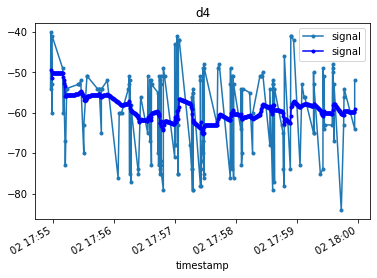

<Figure size 432x288 with 0 Axes>

In [102]:
plot_signals(dfs8, filtered_ri)


In [103]:
# del(filtered_max_mean)
# del(filtered_mean)
# del(filtered)


## Merge the dfs


In [ ]:
mrgr = DfMerger("signal", "timestamp")
filtered_mrgd = mrgr.merge_dfs(filtered_ri)
filtered_mean_mrgd = mrgr.merge_dfs(filtered_mean_ri)


In [ ]:
quad = BpQuadlateration(d1_coord, d2_coord, d3_coord, d4_coord, 1.8)


In [ ]:
def quadlaterate(row):
    return quad.quadlaterate(row["signal1"], row["signal2"], row["signal3"], row["signal4"]).x

filtered_mrgd["pos_res"] = filtered_mrgd.apply(quadlaterate, axis=1)
filtered_mean_mrgd["pos_res"] = filtered_mean_mrgd.apply(quadlaterate, axis=1)


In [ ]:
def split_pos_res_column(df):
    df["x"], df["y"], df["tx"] = zip(*df['pos_res'])
    
split_pos_res_column(filtered_mrgd)
split_pos_res_column(filtered_mean_mrgd)


In [ ]:
ax = filtered_mean_mrgd.plot(kind="scatter", x="x", y="y", xlim = (0, 4.2), ylim=(0, 2.9), c=np.arange(len(filtered_mean_mrgd)), cmap='viridis', alpha=0.5)
plt.plot(*p8_coord, marker="x", color="red")

In [ ]:
filtered_mrgd.plot(kind="scatter", x="x", y="y", xlim = (0, 4.2), ylim=(0, 2.9), c=np.arange(len(filtered_mrgd)), cmap='viridis', alpha=0.5)
plt.plot(*p8_coord, marker="x", color="red")

### Let's also try Kalman filtering this

In [ ]:
from filterpy.common import Q_discrete_white_noise
from filterpy.kalman import ExtendedKalmanFilter

In [ ]:
dt = 0.5
rk = ExtendedKalmanFilter(dim_x=3, dim_z=4)

def get_Hi(i, n):
    xi, yi = i
    def Hi_at(s):
        x, y, tx = s
        dh_by_dx = -10 * n * (x - xi) / (log(10) * ((x - xi)**2 + (y - yi)**2))
        dh_by_dy = -10 * n * (y - yi) / (log(10) * ((x - xi)**2 + (y - yi)**2))
        dh_by_dtx = 1
        return np.array([dh_by_dx, dh_by_dy, dh_by_dtx])
    return Hi_at

n=1.8
        
H_at = [get_Hi(d1_coord, n), get_Hi(d2_coord, n), get_Hi(d3_coord, n), get_Hi(d4_coord, n)]

def HJacobian_at(s):
    return np.array([H_at[0](s), H_at[1](s), H_at[2](s), H_at[3](s)])

def get_hi(i, n):
    xi, yi = i
    def hi_at(s):
        x, y, tx = s
        return tx - 10 * n * log10(sqrt((x - xi)**2 + (y - yi)**2))
    return hi_at
    
h_at = [get_hi(d1_coord, n), get_hi(d2_coord, n), get_hi(d3_coord, n), get_hi(d4_coord, n)]

def hs_at(s):
    return np.array([h_at[0](s), h_at[1](s), h_at[2](s), h_at[3](s)])

# according to the cc2400 precision
rss_std = 4
rss_std_sq = rss_std ** 2

rk.Q[0:2, 0:2] = Q_discrete_white_noise(2, dt=dt, var=0.1)
rk.Q[2, 2] = 1

# rk.Q = np.eye(3) * 0.1

rk.R = np.eye(4) * rss_std_sq

rk.x = np.array([1.5, 1.5, -20])
rk.F = np.eye(3)

rk.P = np.array([[2, 0, 0],
                 [0, 2, 0],
                 [0, 0, 20]])

def kalman(row):
    rk.predict_update(np.array([row["signal1"], row["signal2"], row["signal3"], row["signal4"]]), HJacobian_at, hs_at)
    return rk.x

res = filtered_mrgd.dropna().apply(kalman, axis=1)

def split5(x):
    return x[0], x[1], x[2]

def split_res_column(series):
    df = pd.DataFrame()
    df["kalman_x"], df["kalman_y"], df["kalman_tx"] = zip(*series.map(split5))
    return df

result = split_res_column(res)

In [ ]:
dfs8[1].signal.plot.hist(bins=50)

In [ ]:
filtered[1].signal.plot.hist(bins=50)

In [ ]:
result.plot(kind="scatter", x="kalman_x", y="kalman_y", xlim = (0, 4.2), ylim=(0, 2.9), c=np.arange(len(result)), cmap='viridis', alpha=0.5)
plt.plot(*p8_coord, marker="x", color="red")


In [ ]:
import math
np.mean([258.5, 253.25, 206.25, 231.0, 299.5, 249.75, 190.75, 228.0])

In [ ]:
np.mean([439.5, 354.75, 397.5, 334.0, 306.5, 284.0, 132.75, 285.75, 244.75])
